**Importing Libraries**

In [224]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer

**Reading Data**

In [225]:
train = pd.read_csv(r'D:\AIPlanetHackathon\Train_Data.csv')
test = pd.read_csv(r'D:\AIPlanetHackathon\Test_Data.csv')

**Exploratary Data Anaylsis**

In [226]:
print("Shape of Train data :-",train.shape)
print("Shape of Test data :-",test.shape)

Shape of Train data :- (86845, 43)
Shape of Test data :- (21712, 42)


In [227]:
#Seeking information of Train data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86845 entries, 0 to 86844
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   duration                86845 non-null  int64  
 1   protocoltype            86845 non-null  object 
 2   service                 86845 non-null  object 
 3   flag                    86845 non-null  object 
 4   srcbytes                86845 non-null  int64  
 5   dstbytes                86845 non-null  int64  
 6   land                    86845 non-null  int64  
 7   wrongfragment           86845 non-null  int64  
 8   urgent                  86845 non-null  int64  
 9   hot                     86845 non-null  int64  
 10  numfailedlogins         86845 non-null  int64  
 11  loggedin                86845 non-null  int64  
 12  numcompromised          86845 non-null  int64  
 13  rootshell               86845 non-null  int64  
 14  suattempted             86845 non-null

In [228]:
#Seeking information of Test data
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21712 entries, 0 to 21711
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   duration                21712 non-null  int64  
 1   protocoltype            21712 non-null  object 
 2   service                 21712 non-null  object 
 3   flag                    21712 non-null  object 
 4   srcbytes                21712 non-null  int64  
 5   dstbytes                21712 non-null  int64  
 6   land                    21712 non-null  int64  
 7   wrongfragment           21712 non-null  int64  
 8   urgent                  21712 non-null  int64  
 9   hot                     21712 non-null  int64  
 10  numfailedlogins         21712 non-null  int64  
 11  loggedin                21712 non-null  int64  
 12  numcompromised          21712 non-null  int64  
 13  rootshell               21712 non-null  int64  
 14  suattempted             21712 non-null

In [229]:
train.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag,attack
0,0,tcp,netbios_dgm,REJ,0,0,0,0,0,0,...,0.06,0.06,0.00,0.00,0.00,0.0,1.00,1.0,21,neptune
1,0,tcp,smtp,SF,1239,400,0,0,0,0,...,0.45,0.04,0.00,0.00,0.11,0.0,0.02,0.0,18,normal
2,0,tcp,http,SF,222,945,0,0,0,0,...,1.00,0.00,0.02,0.03,0.00,0.0,0.00,0.0,21,normal
3,0,tcp,http,SF,235,1380,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,21,normal
4,0,tcp,uucp_path,REJ,0,0,0,0,0,0,...,0.01,0.08,0.00,0.00,0.00,0.0,1.00,1.0,19,neptune


In [230]:
train.isnull().sum()

duration                  0
protocoltype              0
service                   0
flag                      0
srcbytes                  0
dstbytes                  0
land                      0
wrongfragment             0
urgent                    0
hot                       0
numfailedlogins           0
loggedin                  0
numcompromised            0
rootshell                 0
suattempted               0
numroot                   0
numfilecreations          0
numshells                 0
numaccessfiles            0
numoutboundcmds           0
ishostlogin               0
isguestlogin              0
count                     0
srvcount                  0
serrorrate                0
srvserrorrate             0
rerrorrate                0
srvrerrorrate             0
samesrvrate               0
diffsrvrate               0
srvdiffhostrate           0
dsthostcount              0
dsthostsrvcount           0
dsthostsamesrvrate        0
dsthostdiffsrvrate        0
dsthostsamesrcportra

In [231]:
train.duplicated().sum()

0

The train dataset doesn't contain any missing values and duplicate values

In [232]:
#Statisical overview
train.describe()

,duration,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,...,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag
count,86845.000000,8.684500e+04,8.684500e+04,86845.000000,86845.0,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,...,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000
mean,104.166872,8.455707e+03,2.732095e+03,0.000046,0.0,0.000035,0.144971,0.000771,0.441142,0.320583,...,123.338269,0.526457,0.050186,0.075810,0.016246,0.324666,0.318934,0.092391,0.091045,20.060522
std,1038.273538,3.582141e+05,5.543041e+04,0.006787,0.0,0.007588,1.837958,0.037009,0.496527,27.993474,...,112.704010,0.447353,0.103323,0.208388,0.055271,0.464291,0.463506,0.282768,0.281452,1.421425
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,12.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000
50%,0.000000,4.600000e+01,4.400000e+01,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,77.000000,0.550000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000
75%,0.000000,2.720000e+02,7.680000e+02,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.020000,0.010000,1.000000,1.000000,0.000000,0.000000,21.000000
max,40504.000000,8.958152e+07,7.028652e+06,1.000000,0.0,2.000000,77.000000,4.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [233]:
train.describe(include='object')

,protocoltype,service,flag,attack
count,86845,86845,86845,86845
unique,3,65,10,2
top,tcp,http,SF,normal
freq,75876,31505,50672,53847


from above anaylsis we find that service column has 65 unique values which cause sparse data and Curse of dimensionality so we drop this column.

In [234]:
train.drop('service',axis=1,inplace=True)

<Axes: title={'center': 'Cases of attack in different Protocols'}, xlabel='protocoltype', ylabel='count'>

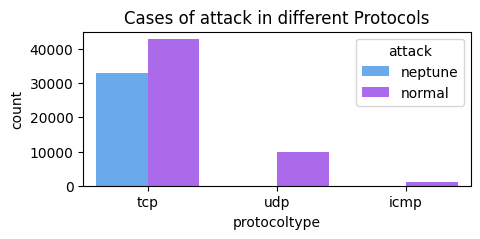

In [235]:
plt.figure(figsize=(5,2))
plt.title('Cases of attack in different Protocols')
sns.countplot(data=train,x='protocoltype',hue='attack',palette='cool')

Cases of Neptune attacks in high in tcp protocol and suprisingly no case of Neptune attack in udp and icmp protocols

**Feature Engneering**

In [236]:
#first gives Binary representation to the attack column 
#Denoting normal as 0 and neptune as 1
train['Attack_Type'] = train['attack'].apply(lambda x: 0 if x == 'normal' else 1)

In [237]:
train.head(10)

,duration,protocoltype,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,...,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag,attack,Attack_Type
0,0,tcp,REJ,0,0,0,0,0,0,0,...,0.06,0.00,0.00,0.00,0.0,1.00,1.0,21,neptune,1
1,0,tcp,SF,1239,400,0,0,0,0,0,...,0.04,0.00,0.00,0.11,0.0,0.02,0.0,18,normal,0
2,0,tcp,SF,222,945,0,0,0,0,0,...,0.00,0.02,0.03,0.00,0.0,0.00,0.0,21,normal,0
3,0,tcp,SF,235,1380,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0.0,0.00,0.0,21,normal,0
4,0,tcp,REJ,0,0,0,0,0,0,0,...,0.08,0.00,0.00,0.00,0.0,1.00,1.0,19,neptune,1
5,0,tcp,SF,348,2029,0,0,0,0,0,...,0.00,0.03,0.04,0.00,0.0,0.00,0.0,21,normal,0
6,0,tcp,S0,0,0,0,0,0,0,0,...,0.09,0.00,0.00,1.00,1.0,0.00,0.0,21,neptune,1
7,0,tcp,S0,0,0,0,0,0,0,0,...,0.07,0.00,0.00,1.00,1.0,0.00,0.0,19,neptune,1
8,0,tcp,REJ,0,0,0,0,0,0,0,...,0.06,0.00,0.00,0.00,0.0,1.00,1.0,18,neptune,1
9,0,tcp,SF,242,380,0,0,0,0,0,...,0.00,0.03,0.04,0.00,0.0,0.00,0.0,21,normal,0


In [238]:
#Droping the attack column from the train dataset
train.drop('attack',axis=1,inplace=True)

In [239]:
train.head()

,duration,protocoltype,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag,Attack_Type
0,0,tcp,REJ,0,0,0,0,0,0,0,...,0.06,0.06,0.00,0.00,0.00,0.0,1.00,1.0,21,1
1,0,tcp,SF,1239,400,0,0,0,0,0,...,0.45,0.04,0.00,0.00,0.11,0.0,0.02,0.0,18,0
2,0,tcp,SF,222,945,0,0,0,0,0,...,1.00,0.00,0.02,0.03,0.00,0.0,0.00,0.0,21,0
3,0,tcp,SF,235,1380,0,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,21,0
4,0,tcp,REJ,0,0,0,0,0,0,0,...,0.01,0.08,0.00,0.00,0.00,0.0,1.00,1.0,19,1


In [240]:
#Now separate the target variable from the Train dataset 
variables = train.drop('Attack_Type',axis=1)
target = train['Attack_Type']

In [181]:
target

0        1
1        0
2        0
3        0
4        1
        ..
86840    0
86841    0
86842    0
86843    0
86844    0
Name: Attack_Type, Length: 86845, dtype: int64

In [241]:
transformer = ColumnTransformer(transformers=[('tnfs',OneHotEncoder(drop='first'),['protocoltype','flag'])],remainder='passthrough')

In [242]:
variable_transformed = transformer.fit_transform(variables)

**Training and Testing the Data**

In [243]:
#test and train data splitting
x_train,x_test,y_train,y_test = train_test_split(variable_transformed,target,test_size=0.2,random_state=42)

In [244]:
x_train.shape

(69476, 50)

In [245]:
#now to standardise the data 
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

**Logistic Regression model**

In [246]:
model_lr = LogisticRegression()

In [247]:
model_lr.fit(scaled_x_train,y_train)

LogisticRegression()

In [248]:
y_pred = model_lr.predict(scaled_x_test)

In [249]:
data_accuracy = accuracy_score(y_test, y_pred)
data_f1_score = f1_score(y_test,y_pred)
data_cross_val_score = np.mean(cross_val_score(LogisticRegression(),scaled_x_train,y_train,scoring='accuracy',cv=20))
print('Accuracy Score = ', data_accuracy)
print('Cross Validation Score = ', data_cross_val_score)
print('F1_score = ', data_f1_score)

Accuracy Score =  0.999712130807761
Cross Validation Score =  0.999755316985161
F1_score =  0.9996215275149497


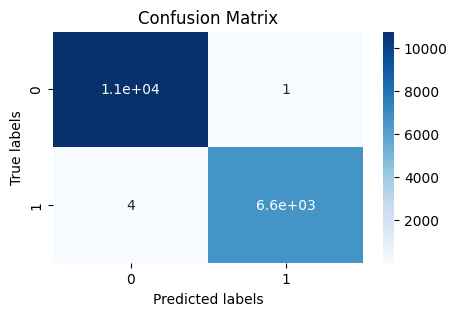

In [250]:
conf_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(5, 3))
sns.heatmap(conf_mat, annot=True, cmap='Blues')

# Add labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

**Random Forest Classifier Model**

In [251]:
model_rf = RandomForestClassifier()

In [252]:
model_rf.fit(scaled_x_train,y_train)

RandomForestClassifier()

In [253]:
y_pred_rf = model_rf.predict(scaled_x_test)

In [254]:
data_accuracy = accuracy_score(y_test, y_pred_rf)
data_f1_score = f1_score(y_test,y_pred_rf)
data_cross_val_score = np.mean(cross_val_score(model_rf,scaled_x_train,y_train,scoring='accuracy',cv=20))
print('Accuracy Score = ', data_accuracy)
print('Cross Validation Score = ', data_cross_val_score)
print('F1_score = ', data_f1_score)

Accuracy Score =  1.0
Cross Validation Score =  0.9999712147380542
F1_score =  1.0


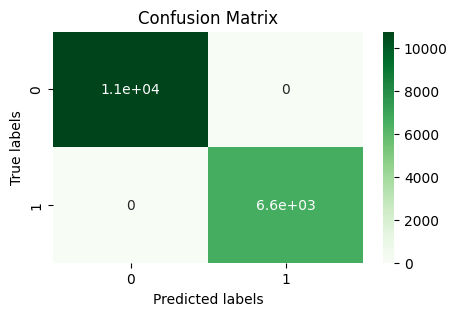

In [255]:
conf_mat = confusion_matrix(y_test, y_pred_rf)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(5, 3))
sns.heatmap(conf_mat, annot=True, cmap='Greens')

# Add labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

Random Forest Classifier predict more accurately

Prediction on Test_Data

In [256]:
#Data preprocessing
def transformation(dataframe):
    dataframe.drop('service',axis=1,inplace=True)
    transformed_data = transformer.transform(dataframe)
    scaled_data_test=scaler.transform(transformed_data)
    return scaled_data_test

In [257]:
test_data = transformation(test)

Test data prediction

In [259]:
y_pred = model_rf.predict(test_data)

In [266]:
y_pred

array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

In [267]:
y_pred_labels = ['normal' if x == 0 else 'neptune' for x in y_pred]

# create a Pandas DataFrame with the predicted labels
submission_df = pd.DataFrame({'attack': y_pred_labels})

# save the DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)